Identify socioeconomic, healthcare, and environmental factors contributing to high mortality rates.


poverty
education
income
occupation

Healthcare

Possible causes or areas to analyse

D1share of population covered by health insurance

D2percentage of oneyear olds immunized

D3 births attended by skilled health staff


how did this impact the mortality rate


second iteration
check d8

In [1]:
!unzip '/content/Infant Mortality Dataset.zip' -d /content/

Archive:  /content/Infant Mortality Dataset.zip
  inflating: /content/1. youth-mortality-rate.csv  
  inflating: /content/2. number-of-infant-deaths-unwpp.csv  
  inflating: /content/3. child-mortality-by-income-level-of-country.csv  
  inflating: /content/4. Distribution of Causes of Death among Children Aged less than 5 years.csv  
  inflating: /content/5. number-of-maternal-deaths-by-region.csv  
  inflating: /content/6. births-attended-by-health-staff-sdgs.csv  
  inflating: /content/7. global-vaccination-coverage.csv  
  inflating: /content/8. health-protection-coverage.csv  


In [2]:
#import necessary libraries

import pandas as pd



In [3]:
pop_health = pd.read_csv('/content/8. health-protection-coverage.csv')

pop_health.head()


,Entity,Code,Year,Share of population covered by health insurance (ILO (2014))
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2
2,American Samoa,ASM,2009,3.0
3,Angola,AGO,2010,0.0
4,Antigua and Barbuda,ATG,2007,51.1


In [4]:
pop_health.Entity.value_counts()

,count
Entity,
Albania,1
Russia,1
Netherlands,1
New Zealand,1
Nicaragua,1
...,...
Georgia,1
Germany,1
Ghana,1


In [5]:
pop_health.shape

(162, 4)

In [6]:
african_capitals = {
    'Algeria': 'Algiers',
    'Angola': 'Luanda',
    'Benin': 'Porto-Novo',
    'Botswana': 'Gaborone',
    'Burkina Faso': 'Ouagadougou',
    'Burundi': 'Gitega',
    'Cabo Verde': 'Praia',
    'Cameroon': 'Yaounde',
    'Central African Republic': 'Bangui',
    'Chad': 'N\'Djamena',
    'Comoros': 'Moroni',
    'Congo, Democratic Republic of the': 'Kinshasa',
    'Congo, Republic of the': 'Brazzaville',
    'Cote d\'Ivoire': 'Yamoussoukro',
    'Djibouti': 'Djibouti',
    'Egypt': 'Cairo',
    'Equatorial Guinea': 'Malabo',
    'Eritrea': 'Asmara',
    'Eswatini': 'Mbabane',
    'Ethiopia': 'Addis Ababa',
    'Gabon': 'Libreville',
    'Gambia': 'Banjul',
    'Ghana': 'Accra',
    'Guinea': 'Conakry',
    'Guinea-Bissau': 'Bissau',
    'Kenya': 'Nairobi',
    'Lesotho': 'Maseru',
    'Liberia': 'Monrovia',
    'Libya': 'Tripoli',
    'Madagascar': 'Antananarivo',
    'Malawi': 'Lilongwe',
    'Mali': 'Bamako',
    'Mauritania': 'Nouakchott',
    'Mauritius': 'Port Louis',
    'Morocco': 'Rabat',
    'Mozambique': 'Maputo',
    'Namibia': 'Windhoek',
    'Niger': 'Niamey',
    'Nigeria': 'Abuja',
    'Rwanda': 'Kigali',
    'Sao Tome and Principe': 'Sao Tome',
    'Senegal': 'Dakar',
    'Seychelles': 'Victoria',
    'Sierra Leone': 'Freetown',
    'Somalia': 'Mogadishu',
    'South Africa': 'Pretoria',
    'South Sudan': 'Juba',
    'Sudan': 'Khartoum',
    'Tanzania': 'Dodoma',
    'Togo': 'Lome',
    'Tunisia': 'Tunis',
    'Uganda': 'Kampala',
    'Zambia': 'Lusaka',
    'Zimbabwe': 'Harare'
}

In [7]:
# Assuming your DataFrame is called 'pop_health' and the column with country/capital names is 'Entity'

# Filter for rows where the 'Entity' value is in the keys of 'african_capitals'
filtered_pop_health = pop_health[pop_health['Entity'].isin(african_capitals.keys()) | pop_health['Entity'].isin(african_capitals.values())]

# Now 'filtered_pop_health' contains only the rows where the 'Entity' value is either a country or a capital city in Africa

In [8]:
filtered_pop_health.Entity.value_counts()

,count
Entity,
Algeria,1
Senegal,1
Mauritius,1
Morocco,1
Namibia,1
Niger,1
Nigeria,1
Rwanda,1
Sao Tome and Principe,1


In [9]:
filtered_pop_health.shape

(38, 4)

In [10]:
filtered_pop_health.rename(columns ={filtered_pop_health.columns[-1]:'percentage of health'},inplace = True)

<ipython-input-10-b38f0956050c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pop_health.rename(columns ={filtered_pop_health.columns[-1]:'percentage of health'},inplace = True)


In [11]:
filtered_pop_health.reset_index().head()

,index,Entity,Code,Year,percentage of health
0,1,Algeria,DZA,2005,85.2
1,3,Angola,AGO,2010,0.0
2,18,Benin,BEN,2009,9.0
3,25,Burkina Faso,BFA,2010,1.0
4,26,Burundi,BDI,2009,28.4


In [12]:
filtered_pop_health.drop(columns = ['Code'],inplace = True)

<ipython-input-12-ccc9310ff339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pop_health.drop(columns = ['Code'],inplace = True)


In [13]:
filtered_pop_health.head()

,Entity,Year,percentage of health
1,Algeria,2005,85.2
3,Angola,2010,0.0
18,Benin,2009,9.0
25,Burkina Faso,2010,1.0
26,Burundi,2009,28.4


In [14]:
filtered_pop_health.groupby(['Entity','Year'])['percentage of health'].mean()

,,percentage of health
Entity,Year,
Algeria,2005,85.2
Angola,2010,0.0
Benin,2009,9.0
Burkina Faso,2010,1.0
Burundi,2009,28.4
Cameroon,2009,2.0
Central African Republic,2008,6.0
Cote d'Ivoire,2008,1.2
Djibouti,2006,30.0


In [15]:
#make a plot of countries covered by health insurance then check if those countries were among high mortality rate


Text(0, 0.5, 'Country')

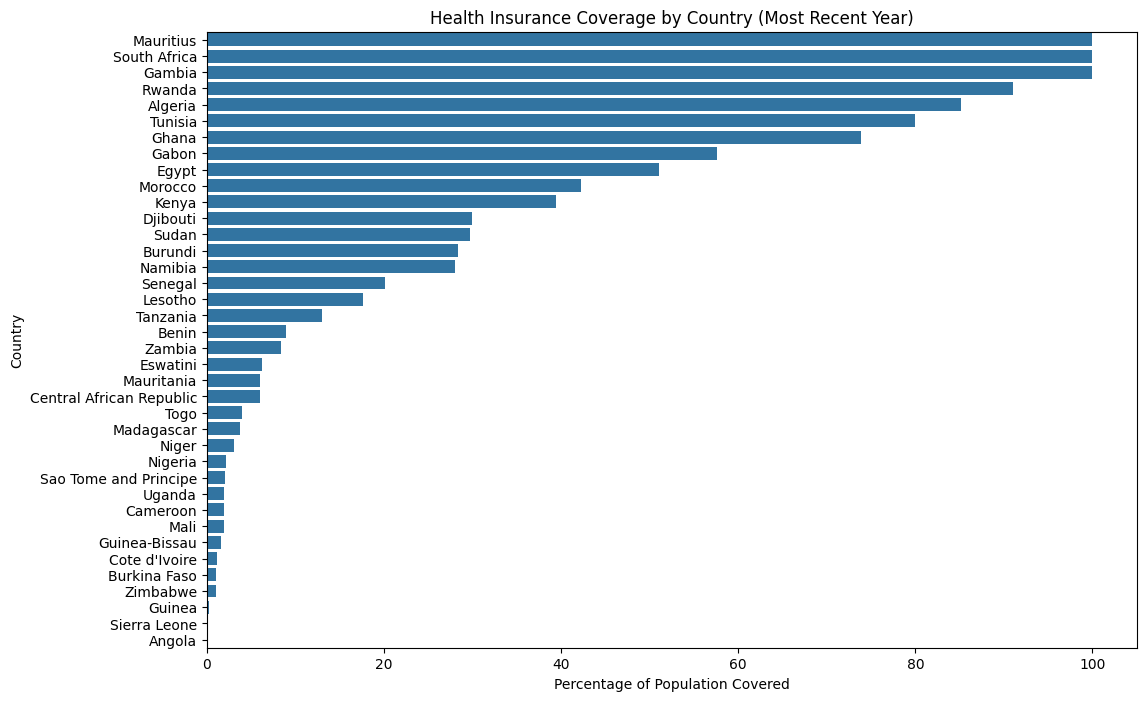

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


# Sort by health insurance coverage for better visualization
recent_data = filtered_pop_health.sort_values(by=['percentage of health'], ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.barplot(x='percentage of health', y='Entity', data=recent_data)
plt.title('Health Insurance Coverage by Country (Most Recent Year)')
plt.xlabel('Percentage of Population Covered')
plt.ylabel('Country')

In [17]:
#next question, did the percentage impact maternity rate?

#check for lowest maternity rate countries
#with 10 least values if it corresponds with the pop health

In [18]:
#load dataset
youth_mortality_rate = pd.read_csv('/content/1. youth-mortality-rate.csv')
youth_mortality_rate.head()

,Entity,Code,Year,Under-fifteen mortality rate
0,Afghanistan,AFG,1977,30.110573
1,Afghanistan,AFG,1978,29.290777
2,Afghanistan,AFG,1979,28.479010
3,Afghanistan,AFG,1980,27.649078
4,Afghanistan,AFG,1981,26.834482


In [19]:
# Filter for rows where the 'Entity' value is in the keys of 'african_capitals'
youth_mortality_rate = youth_mortality_rate[youth_mortality_rate['Entity'].isin(african_capitals.keys()) | youth_mortality_rate['Entity'].isin(african_capitals.values())]


In [20]:
youth_mortality_rate.shape

(2310, 4)

In [21]:
youth_mortality_rate.head()

,Entity,Code,Year,Under-fifteen mortality rate
112,Algeria,DZA,1979,18.178753
113,Algeria,DZA,1980,16.790104
114,Algeria,DZA,1981,15.191734
115,Algeria,DZA,1982,13.394593
116,Algeria,DZA,1983,11.594862


In [22]:
mean_mortality_rates =youth_mortality_rate.groupby('Entity')['Under-fifteen mortality rate'].mean()

In [55]:

# Sort the mean values in ascending order
sorted_mortality_rates = mean_mortality_rates.sort_values()

# Get the 10 least values
least_values = sorted_mortality_rates.head(5)
highest_values = sorted_mortality_rates.tail(5)

print(least_values)


Entity
Libya           3.188299
Seychelles      4.135200
Mauritius       4.926942
Algeria         5.744129
South Africa    6.593399
Name: Under-fifteen mortality rate, dtype: float64


In [24]:
print(highest_values)

Entity
Liberia         20.187777
Sierra Leone    21.011334
Mali            22.307122
Niger           26.006522
Guinea          27.614073
Name: Under-fifteen mortality rate, dtype: float64


<ipython-input-56-0a0aac73ee2a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_mortality_rates.index, y=sorted_mortality_rates.values, palette=colors)


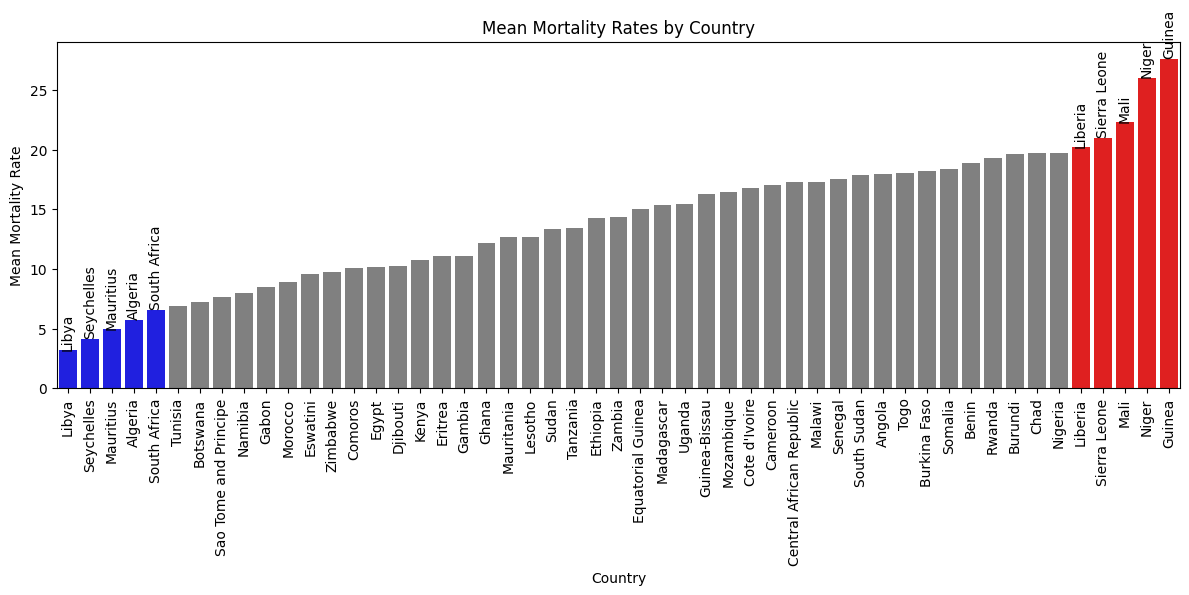

In [56]:

# Create a list of colors for the bars
colors = ['red' if entity in highest_values.index else 'blue' if entity in least_values.index else 'grey' for entity in sorted_mortality_rates.index]

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.barplot(x=sorted_mortality_rates.index, y=sorted_mortality_rates.values, palette=colors)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Mean Mortality Rates by Country')
plt.xlabel('Country')
plt.ylabel('Mean Mortality Rate')

# Add labels for highlighted bars (optional)
for i, entity in enumerate(sorted_mortality_rates.index):
    if entity in highest_values.index or entity in least_values.index:
        plt.text(i, sorted_mortality_rates[entity], entity, ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

In [45]:
#let's check for under-fives
under_five_death = pd.read_csv('/content/7. global-vaccination-coverage.csv')

under_five_death.head()

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


In [46]:
# Filter for rows where the 'Entity' value is in the keys of 'african_capitals'
under_five_death = under_five_death[under_five_death['Entity'].isin(african_capitals.keys()) | under_five_death['Entity'].isin(african_capitals.values())]
under_five_death.shape

(1979, 14)

In [27]:
under_five_death['Average Immunized'] = under_five_death[['MCV1 (% of one-year-olds immunized)','BCG (% of one-year-olds immunized)','Pol3 (% of one-year-olds immunized)','DTP3 (% of one-year-olds immunized)']].mean(skipna = True)

In [28]:
under_five_death.head()

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Average Immunized
126,Algeria,DZA,1985,86.0,NaN,NaN,NaN,68.0,NaN,69.0,NaN,NaN,NaN,69.0,NaN
127,Algeria,DZA,1986,88.0,NaN,NaN,NaN,67.0,NaN,72.0,NaN,NaN,NaN,73.0,NaN
128,Algeria,DZA,1987,93.0,NaN,NaN,NaN,73.0,NaN,79.0,NaN,NaN,NaN,79.0,NaN
129,Algeria,DZA,1988,96.0,NaN,NaN,NaN,81.0,NaN,85.0,NaN,NaN,NaN,85.0,NaN
130,Algeria,DZA,1989,96.0,NaN,NaN,NaN,82.0,NaN,87.0,NaN,NaN,NaN,87.0,NaN


In [29]:
under_five_death['Pol3 (% of one-year-olds immunized)'].isna().sum()

19

In [47]:
cols = ['MCV1 (% of one-year-olds immunized)','BCG (% of one-year-olds immunized)','Pol3 (% of one-year-olds immunized)','DTP3 (% of one-year-olds immunized)']

for col in cols:
  under_five_death[col].fillna(under_five_death[col].mean(),inplace = True)

<ipython-input-47-525b68b894fe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  under_five_death[col].fillna(under_five_death[col].mean(),inplace = True)


In [48]:
under_five_death['Average Imm']=under_five_death[cols].mean(axis = 1)
#under_five_death.drop(columns = 'Average Immunized',inplace = True)
under_five_death.rename(columns = {'Average Imm':'Average Immunized'},inplace = True)

In [49]:
mean_under_five_death = under_five_death.groupby('Entity')['Average Immunized'].mean().sort_values()

In [50]:
least_values = mean_under_five_death.head(5)
highest_values = mean_under_five_death.tail(5)

print(least_values)

Entity
Somalia     33.390703
Chad        34.496669
Angola      44.443001
Nigeria     44.947241
Ethiopia    45.241908
Name: Average Immunized, dtype: float64


In [51]:
print(highest_values)

Entity
Libya         89.547619
Mauritius     90.356234
Tunisia       92.226201
Botswana      92.684524
Seychelles    94.530488
Name: Average Immunized, dtype: float64


In [52]:
mean_under_five_death

,Average Immunized
Entity,
Somalia,33.390703
Chad,34.496669
Angola,44.443001
Nigeria,44.947241
Ethiopia,45.241908
Niger,46.750000
Central African Republic,46.809524
Guinea,49.409708
South Sudan,53.454545


<ipython-input-57-cf18af71f640>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_under_five_death.index, y=mean_under_five_death.values, palette=colors)


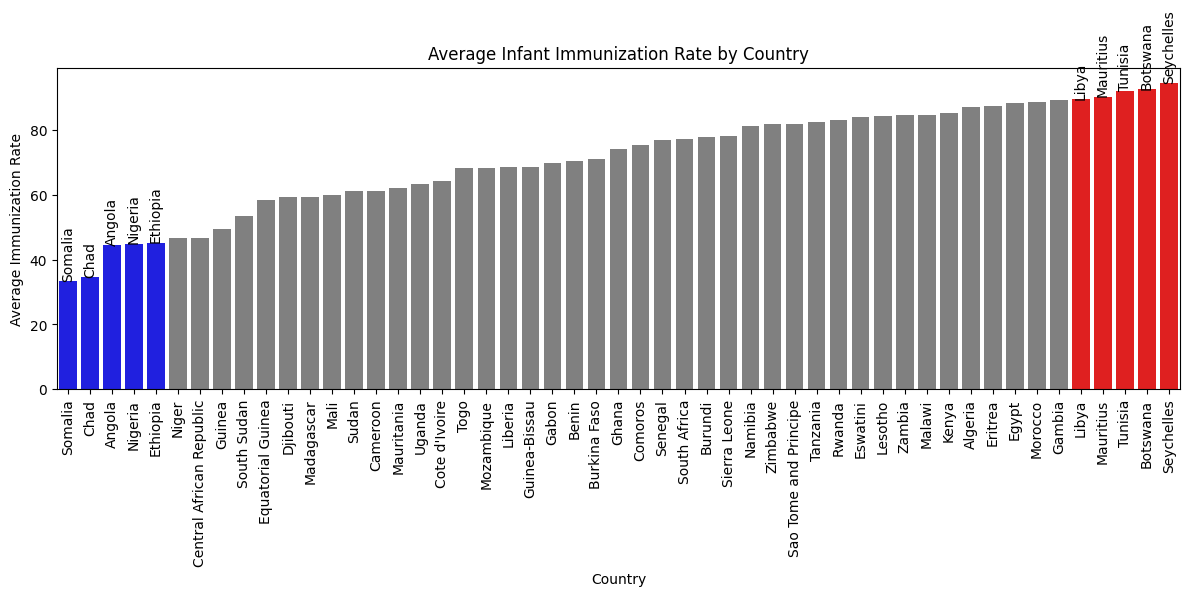

In [57]:


# Assuming you have mean_under_five_death calculated as in your code

# Get the highest and lowest 5 values and their corresponding entities
highest_5 = mean_under_five_death.tail(5)
lowest_5 = mean_under_five_death.head(5)

# Create a list of colors for the bars
colors = ['red' if entity in highest_5.index else 'blue' if entity in lowest_5.index else 'grey' for entity in mean_under_five_death.index]

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.barplot(x=mean_under_five_death.index, y=mean_under_five_death.values, palette=colors)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Average Infant Immunization Rate by Country')
plt.xlabel('Country')
plt.ylabel('Average Immunization Rate')

# Add labels for highlighted bars (optional)
for i, entity in enumerate(mean_under_five_death.index):
    if entity in highest_5.index or entity in lowest_5.index:
        plt.text(i, mean_under_five_death[entity], entity, ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()